In [2]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [4]:
df = pd.read_csv('bank-loan.csv')

In [5]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


### Data Cleaning

##### checking for null cells

In [6]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

##### dropping null values

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

##### checking datatypes

In [9]:
df.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

##### Balancing Data Using Oversampling minority class method

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    517
1.0    183
Name: default, dtype: int64


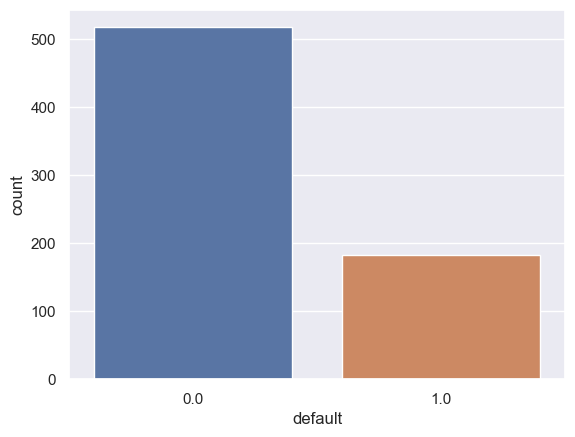

In [10]:
sns.countplot(df['default'])
print(df.default.value_counts())

1.0    517
0.0    517
Name: default, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


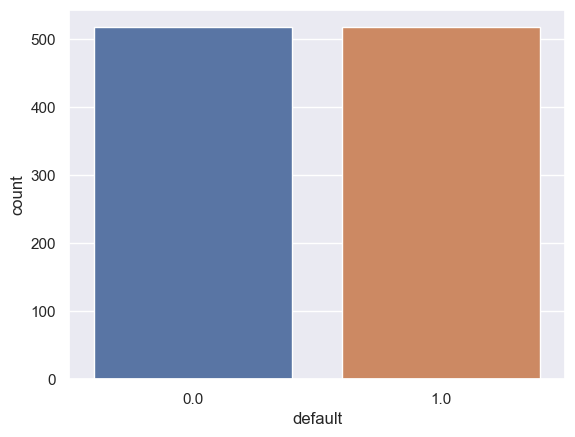

In [11]:
from sklearn.utils import resample
#split dataframe of majority n minority class
df_majority = df[(df['default']==0)]
df_minority = df[(df['default']==1)]
# up sample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True, # sample with replacement
                                 n_samples= 517, # to match majority class
                                 random_state=0) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
sns.countplot(df_upsampled['default'])
print(df_upsampled.default.value_counts())

##### Checking for Outliers using Boxplot

<AxesSubplot:xlabel='age'>

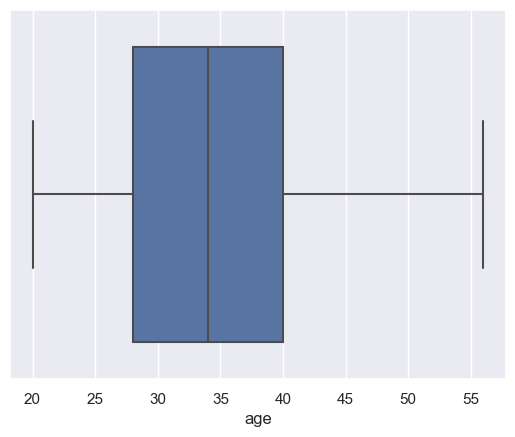

In [12]:
 sns.boxplot(x=df_upsampled["age"])

<AxesSubplot:xlabel='employ'>

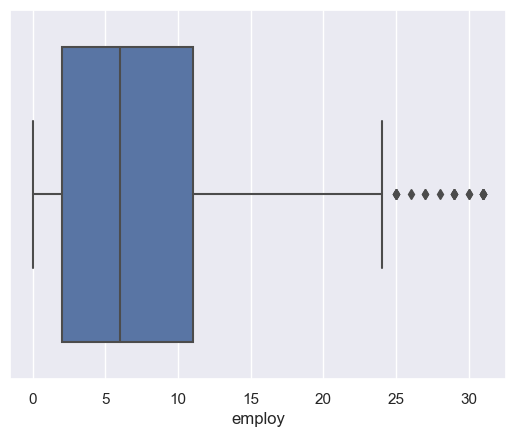

In [13]:
sns.boxplot(x=df_upsampled["employ"])

<AxesSubplot:xlabel='address'>

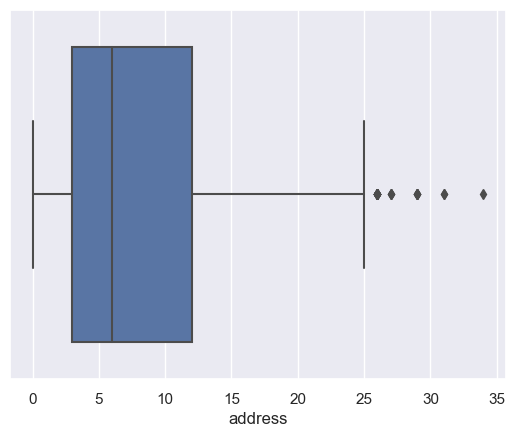

In [14]:
 sns.boxplot(x=df_upsampled["address"])

<AxesSubplot:xlabel='income'>

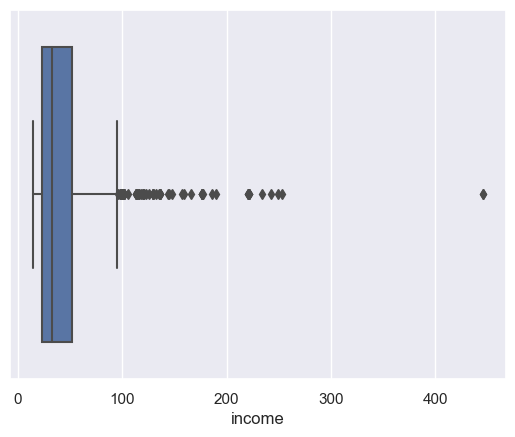

In [15]:
 sns.boxplot(x=df_upsampled["income"])

<AxesSubplot:xlabel='debtinc'>

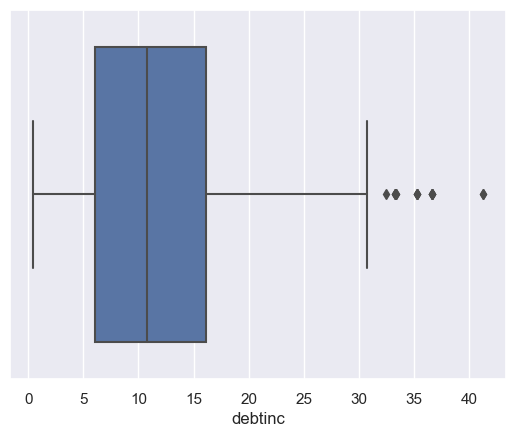

In [16]:
sns.boxplot(x=df_upsampled["debtinc"])

<AxesSubplot:xlabel='creddebt'>

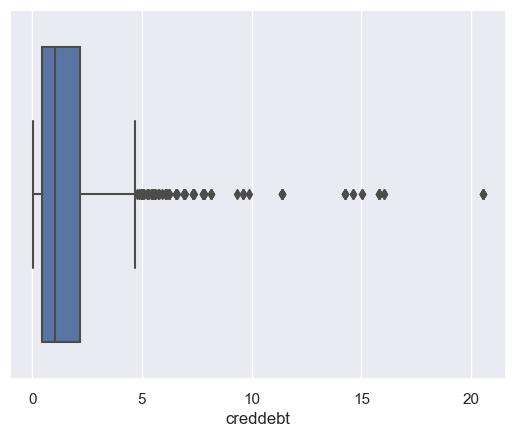

In [17]:
sns.boxplot(x=df_upsampled["creddebt"])

<AxesSubplot:xlabel='othdebt'>

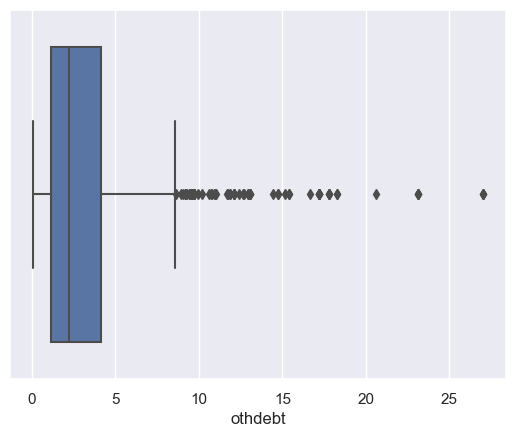

In [18]:
 sns.boxplot(x=df_upsampled["othdebt"])

##### Removing Outliers using Z-Score

In [19]:
import scipy.stats as stats
z = np.abs(stats.zscore(df_upsampled))
data_clean = df_upsampled[(z<3).all(axis = 1)]
data_clean.shape

(965, 9)

##### Data Correlation

<AxesSubplot:>

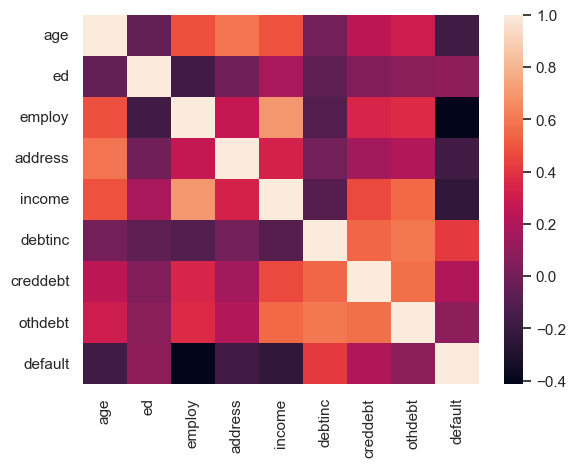

In [20]:
sns.heatmap(data_clean.corr(), fmt='.2g')

##### Correlation between Class and other attributes

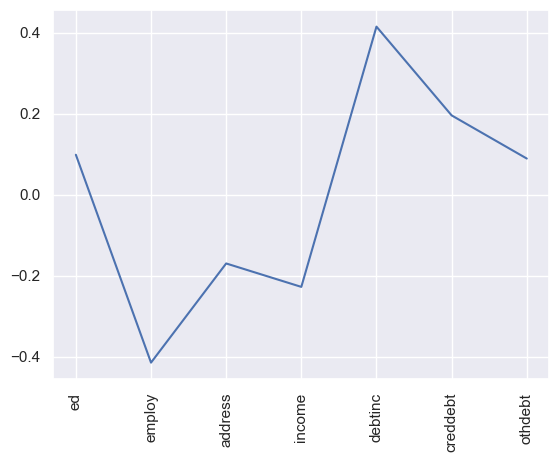

In [21]:
corr = data_clean[data_clean.columns[1:]].corr()['default'][:-1]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()


##### Drop Duplicates

In [22]:
data_clean2 = data_clean.drop_duplicates()
data_clean2.shape


(662, 9)

##### Exploratory Data Analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

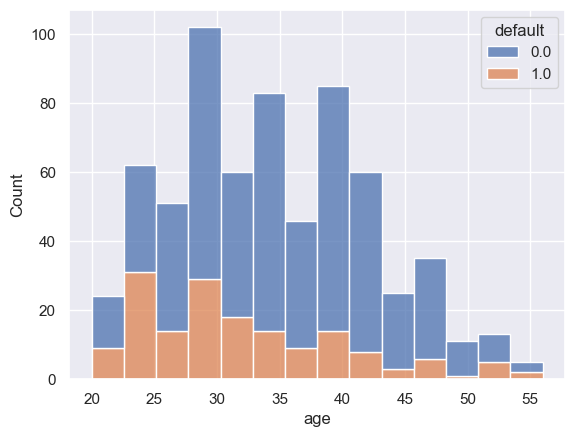

In [23]:
 sns.histplot(data=data_clean2, x="age", hue="default", multiple="stack")

<AxesSubplot:xlabel='ed', ylabel='Count'>

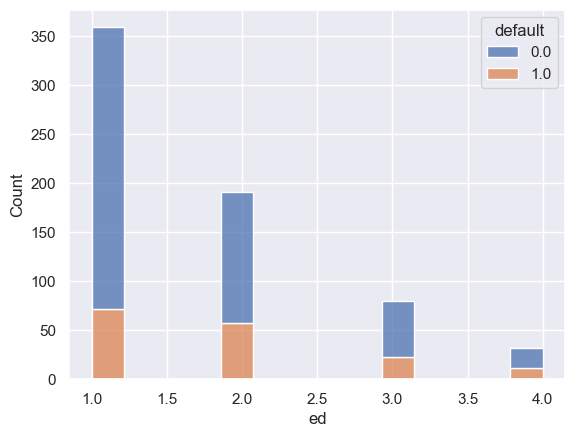

In [24]:
 sns.histplot(data=data_clean2, x="ed", hue="default", multiple="stack")

<AxesSubplot:xlabel='employ', ylabel='Count'>

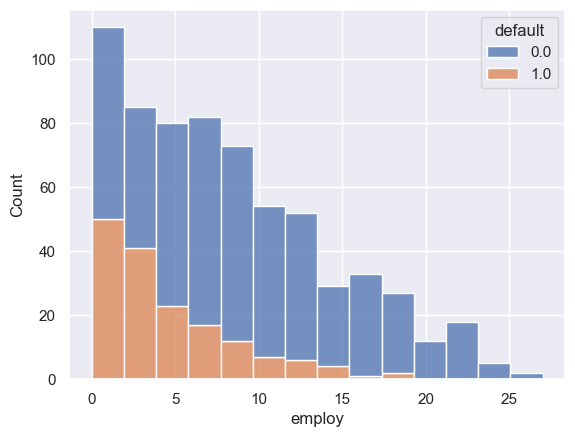

In [25]:
sns.histplot(data=data_clean2, x="employ", hue="default", multiple="stack")

<AxesSubplot:xlabel='address', ylabel='Count'>

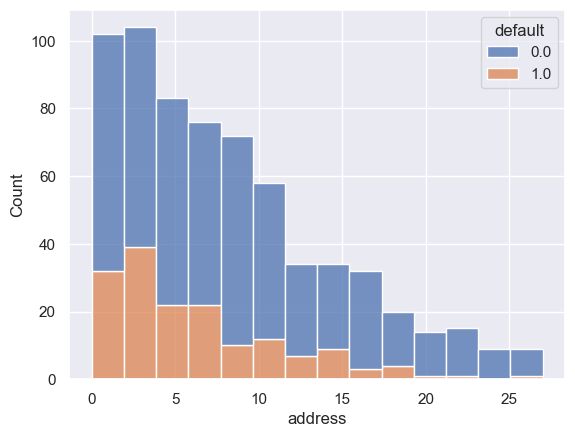

In [26]:
 sns.histplot(data=data_clean2, x="address", hue="default", multiple="stack")

<AxesSubplot:xlabel='income', ylabel='Count'>

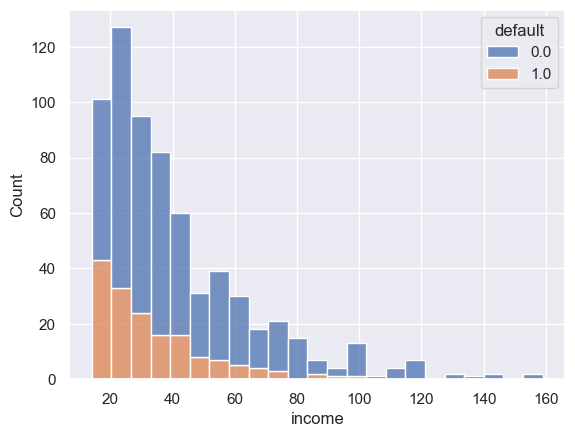

In [27]:
 sns.histplot(data=data_clean2, x="income", hue="default", multiple="stack")

<AxesSubplot:xlabel='debtinc', ylabel='Count'>

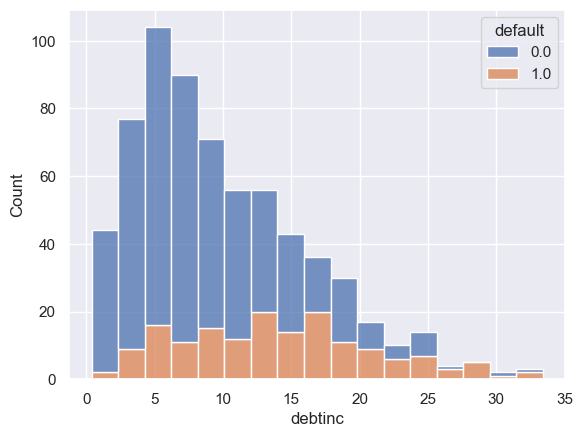

In [28]:
 sns.histplot(data=data_clean2, x="debtinc", hue="default", multiple="stack")

<AxesSubplot:xlabel='creddebt', ylabel='Count'>

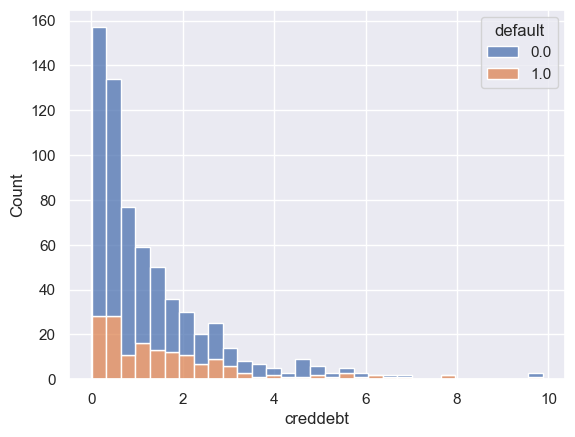

In [29]:
sns.histplot(data=data_clean2, x="creddebt", hue="default", multiple="stack")

<AxesSubplot:xlabel='othdebt', ylabel='Count'>

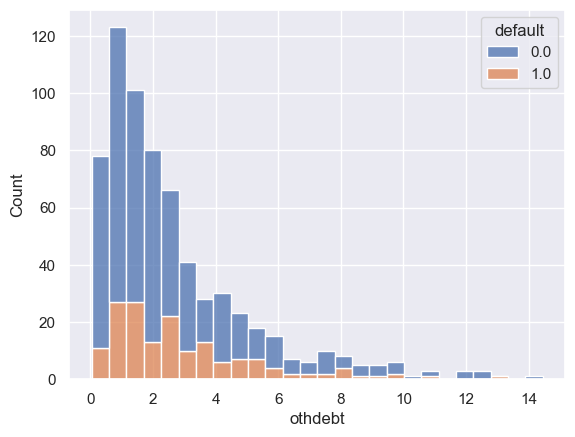

In [30]:
sns.histplot(data=data_clean2, x="othdebt", hue="default", multiple="stack")

##### Train Test Split Method

In [31]:
X = data_clean2.drop('default', axis=1)
y = data_clean2['default']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

##### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 80.45 %


In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))


F-1 Score :  0.5357142857142857
Precision Score :  0.6818181818181818
Recall Score :  0.4411764705882353


##### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [36]:
y_pred = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")


Accuracy Score : 79.7 %


In [37]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))


F-1 Score :  0.5573770491803278
Precision Score :  0.6296296296296297
Recall Score :  0.5


##### K-Fold Cross Validation Method

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=0, shuffle=True)


In [39]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(random_state=0)
X_under, y_under = under.fit_resample(X_train, y_train)
y_under.value_counts()

0.0    129
1.0    129
Name: default, dtype: int64

##### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
scores = cross_val_score(rfc,X_under,y_under,cv = cv,scoring = 'accuracy')
print("Accuracy: ", round(np.mean(scores)*100 ,2), "%")


Accuracy:  75.57 %


In [41]:
rfc.fit(X_under, y_under)
y_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.5909090909090909
Precision Score :  0.48148148148148145
Recall Score :  0.7647058823529411


##### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
scores = cross_val_score(lr,X_under,y_under,cv = cv,scoring = 'accuracy')
print("Accuracy: ", round(np.mean(scores)*100 ,2), "%")

Accuracy:  76.36 %


In [43]:
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))


F-1 Score :  0.5909090909090909
Precision Score :  0.48148148148148145
Recall Score :  0.7647058823529411
